![trainers in a store](trainers.jpg)

Sports clothing and athleisure attire is a huge industry, worth approximately [$193 billion in 2021](https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/) with a strong growth forecast over the next decade! 

In this notebook, you will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. You will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.  

You've been provided with four datasets to investigate:

#  brands.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `brand` | Brand of the product | 

# finance.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `listing_price` | Original price of the product | 
| `sale_price` | Discounted price of the product |
| `discount` | Discount off the listing price, as a decimal | 
| `revenue` | Revenue generated by the product |

# info.csv

| Columns | Description |
|---------|-------------|
| `product_name` | Name of the product | 
| `product_id` | Unique product identifier |
| `description` | Description of the product |

# reviews.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `rating` | Average product rating | 
| `reviews` | Number of reviews for the product |

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
brands = pd.read_csv("brands.csv") 
finance = pd.read_csv("finance.csv")
info = pd.read_csv("info.csv")
reviews = pd.read_csv("reviews.csv")

# Start coding here...

In [115]:
brands.head()

,product_id,brand
0,AH2430,NaN
1,G27341,Adidas
2,CM0081,Adidas
3,B44832,Adidas
4,D98205,Adidas


In [116]:
brands.shape

(3179, 2)

In [117]:
finance.head()

,product_id,listing_price,sale_price,discount,revenue
0,AH2430,NaN,NaN,NaN,NaN
1,G27341,75.99,37.99,0.5,1641.17
2,CM0081,9.99,5.99,0.4,398.93
3,B44832,69.99,34.99,0.5,2204.37
4,D98205,79.99,39.99,0.5,5182.70


In [118]:
info.head()

,product_name,product_id,description
0,NaN,AH2430,NaN
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor..."
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's..."
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...


In [119]:
reviews.head()

,product_id,rating,reviews
0,AH2430,NaN,NaN
1,G27341,3.3,24.0
2,CM0081,2.6,37.0
3,B44832,4.1,35.0
4,D98205,3.5,72.0


In [120]:
# Merge the data
merge_df = info.merge(finance, on='product_id')
merge_df = merge_df.merge(reviews, on='product_id')
merge_df = merge_df.merge(brands, on='product_id')

In [121]:
merge_df.head()

,product_name,product_id,description,listing_price,sale_price,discount,revenue,rating,reviews,brand
0,NaN,AH2430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0,Adidas
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0,Adidas
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37,4.1,35.0,Adidas
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70,3.5,72.0,Adidas


In [122]:
# Drop null value
merge_df.dropna(inplace=True)

In [123]:
merge_df.head()

,product_name,product_id,description,listing_price,sale_price,discount,revenue,rating,reviews,brand
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0,Adidas
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0,Adidas
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37,4.1,35.0,Adidas
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70,3.5,72.0,Adidas
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,Refine your interval training in these women's...,47.99,19.20,0.6,1555.20,1.0,45.0,Adidas


In [124]:
# Sales performance of Adidas and Nike products
# Find the volume of products and associated revenue for Adidas and Nike products, split based on "listing_price" quartiles.

merge_df['price_label']=pd.qcut(merge_df['listing_price'], q=4, labels=['Budget','Average','Expensive','Elite'])

In [125]:
# Calculating metrics based on price_label
adidas_vs_nike = merge_df.groupby(['brand','price_label'], as_index=False).agg(num_product=('price_label','count'),mean_revenue=('revenue','mean')).round(2)

In [126]:
adidas_vs_nike

,brand,price_label,num_product,mean_revenue
0,Adidas,Budget,574,2015.68
1,Adidas,Average,655,3035.30
2,Adidas,Expensive,759,4621.56
3,Adidas,Elite,587,8302.78
4,Nike,Budget,357,1596.33
5,Nike,Average,8,675.59
6,Nike,Expensive,47,500.56
7,Nike,Elite,130,1367.45


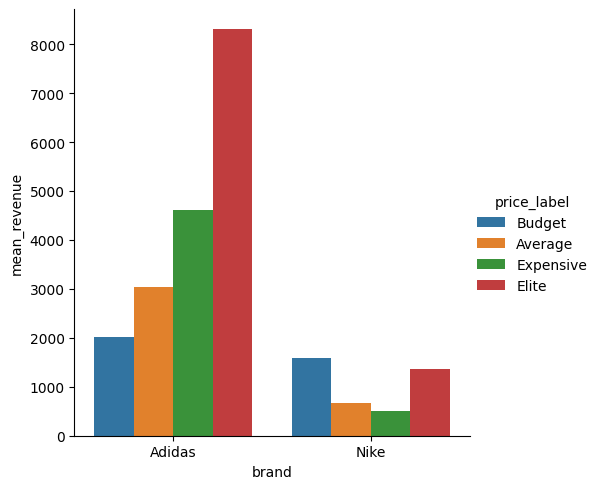

In [127]:
sns.catplot(x='brand',y='mean_revenue', data=adidas_vs_nike, kind='bar', hue='price_label', ci=None)
plt.show()

In [128]:
# Finding the relationship between product description lengths, ratings, and reviews

# Split product description length into bins and assign labels, before calculating the average rating and number of reviews for each range of description length.

# Finding the length of each product description
merge_df['description_length'] = merge_df['description'].str.len()

In [129]:
max_length_description = merge_df['description'].str.len().max()

In [130]:
max_length_description

687

In [131]:
# Creating bins for word limits and labels for description lengths
# Upper description length limits
lengthes = [0,100,200,300,400,500,600,700]

In [132]:
# Description length labels
labels = ['100','200','300','400','500','600','700']

In [133]:
# Assigning labels based on description length and calculating performance metrics
# Cut into bins
merge_df['description_length'] = pd.cut(merge_df['description_length'], bins=lengthes, labels=labels)

In [134]:
merge_df

,product_name,product_id,description,listing_price,sale_price,discount,revenue,rating,reviews,brand,price_label,description_length
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0,Adidas,Expensive,200
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0,Adidas,Budget,200
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37,4.1,35.0,Adidas,Expensive,300
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70,3.5,72.0,Adidas,Expensive,300
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,Refine your interval training in these women's...,47.99,19.20,0.6,1555.20,1.0,45.0,Adidas,Average,300
...,...,...,...,...,...,...,...,...,...,...,...,...
3174,Nike Tiempo Legend 8 Academy TF,AT6100-606,The Nike Tiempo Legend 8 Academy TF takes the ...,0.00,64.95,0.0,0.00,0.0,0.0,Nike,Budget,200
3175,Nike React Metcon AMP,CT9155-063,The Nike React Metcon AMP takes the stability ...,0.00,139.95,0.0,251.91,3.0,1.0,Nike,Budget,400
3176,Air Jordan 8 Retro,CI1236-100,The Air Jordan 8 Retro recaptures the memorabl...,159.95,127.97,0.0,230.35,5.0,1.0,Nike,Elite,300
3177,Nike Air Max 98,AH6799-300,The Nike Air Max 98 features the OG design lin...,0.00,169.95,0.0,1223.64,4.0,4.0,Nike,Budget,300


In [135]:
# Group by the bins
description_length = merge_df.groupby('description_length', as_index=False).agg( mean_rating = ('rating', 'mean'),num_reviews=('reviews','count'))

In [136]:
description_length

,description_length,mean_rating,num_reviews
0,100,2.257143,7
1,200,3.185551,526
2,300,3.277815,1785
3,400,3.285407,651
4,500,3.345763,118
5,600,3.120000,15
6,700,3.653333,15


In [137]:
merge_df['revenue'].corr(merge_df['rating'])

0.11358497104803926

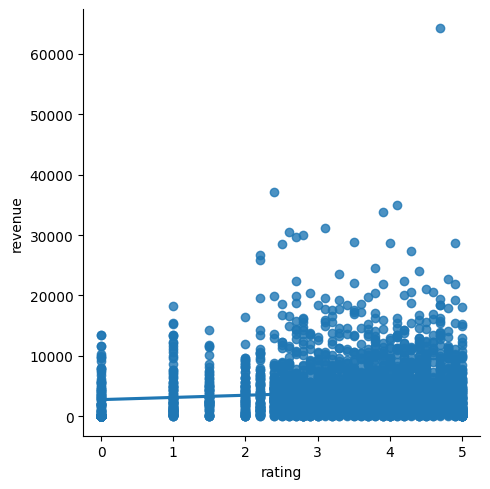

In [138]:
sns.lmplot(x='rating', y='revenue', data=merge_df, ci=None)
plt.show()

In [139]:
merge_df['revenue'].corr(merge_df['discount'])

-0.12382877495968676

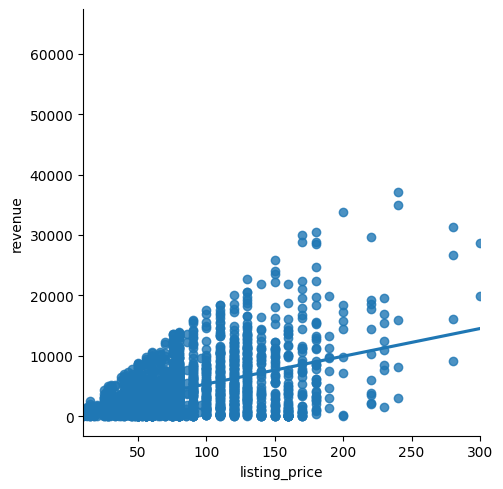

In [140]:
sns.lmplot(x='listing_price', y='revenue', data=merge_df, ci=None)
plt.xlim(10,300)
plt.show()

In [141]:
merge_df['revenue'].corr(merge_df['listing_price'])

0.4817202154418038

In [142]:
merge_df['revenue'].corr(merge_df['reviews'])

0.6521692983239068

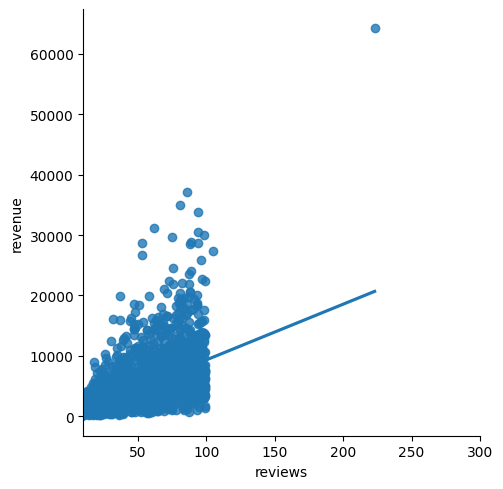

In [143]:
sns.lmplot(x='reviews', y='revenue', data=merge_df, ci=None)
plt.xlim(10,300)
plt.show()

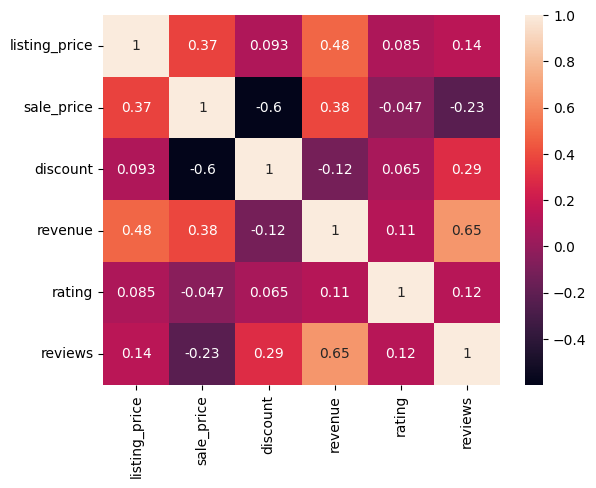

In [144]:
sns.heatmap(merge_df.corr(), annot=True)
plt.show()